# Iris Flower Classification Model

##### By: Ajala Muritala Kolade; December Batch A91

Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the dataset

In [5]:
raw_data = pd.read_csv('Iris_Dataset.csv', encoding = 'latin1')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Check for null values

In [7]:
dataset = raw_data
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
dataset.shape

(150, 5)

In [9]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Check for the data types

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Begin Exploratory Analysis

Bar Charts of Variables

Text(0.5, 1.0, 'Bar Chart of Sepal Length against Count')

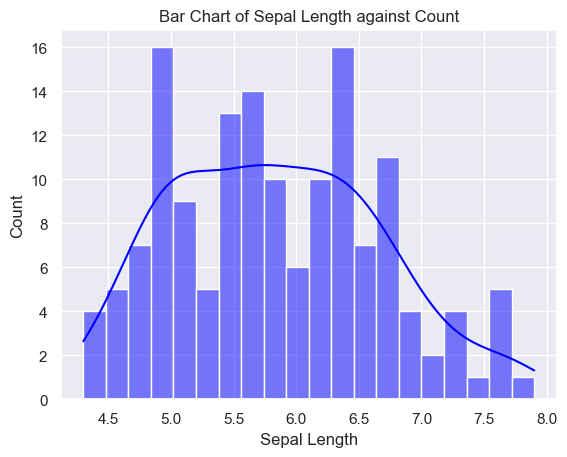

In [14]:
sns.set()
sns.histplot(dataset['sepal_length'], kde = True, bins = 20, color = 'blue')
plt.xlabel('Sepal Length')
plt.title('Bar Chart of Sepal Length against Count')

Text(0.5, 1.0, 'Bar Chart of Sepal Width against Count')

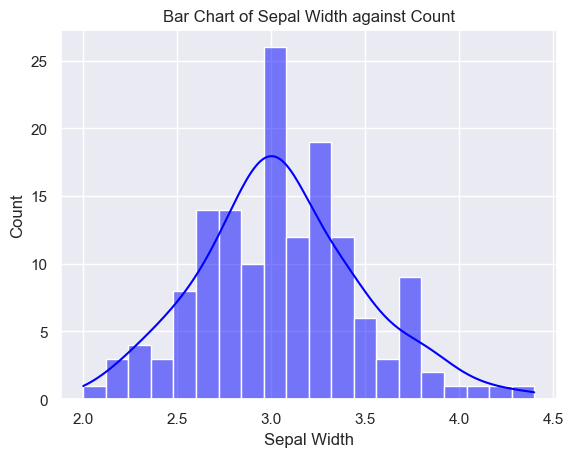

In [15]:
sns.histplot(dataset['sepal_width'], kde = True, bins = 20, color = 'blue')
plt.xlabel('Sepal Width')
plt.title('Bar Chart of Sepal Width against Count')

Text(0.5, 1.0, 'Bar Chart of Petal Length against Count')

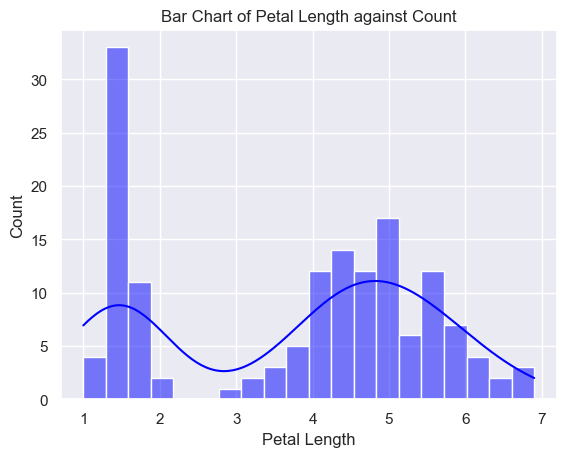

In [16]:
sns.histplot(dataset['petal_length'], kde = True, bins = 20, color = 'blue')
plt.xlabel('Petal Length')
plt.title('Bar Chart of Petal Length against Count')

Text(0.5, 1.0, 'Bar Chart of Petal Width against Count')

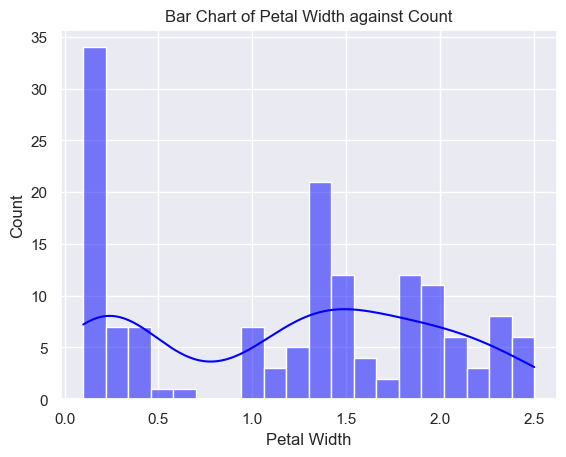

In [17]:
sns.histplot(dataset['petal_width'], kde = True, bins = 20, color = 'blue')
plt.xlabel('Petal Width')
plt.title('Bar Chart of Petal Width against Count')

#### Check for Correlation to determine the features of the model

Use a Correlation Heatmap to prevent calculating the correlation multiple times

In [20]:
dataset['species'] = dataset['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
corr_matrix = dataset.corr()

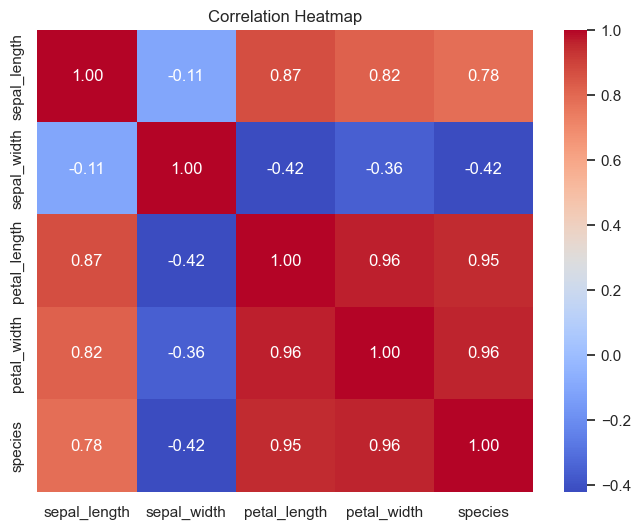

In [21]:
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Train the Prediction Model

Train the model using Linear Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Define the features and the target

In [26]:
X = dataset.drop(columns = ['species'])
y = dataset['species']

Seperate into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Use a Linear Regression Model

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9440499084897118
